# Heart Disease 
#### 1- (age)
#### 2- (sex) (0 = female, 1 = male)
#### 3- (cp) cp: chest pain type -- 1: typical angina -- 2: atypical angina -- 3: non-anginal pain -- 4: asymptomatic
#### 4- (trestbps) trestbps: resting blood pressure (in mm Hg on admission to the hospital)
#### 5- (chol) chol: serum cholesterol in mg/dl
#### 6- (fbs) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### 7- (restecg) restecg: resting electrocardiographic results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#### 8- (thalach) halach: maximum heart rate achieved
#### 9- (exang) exercise induced angina (1 = yes; 0 = no)
#### 10- (oldpeak) oldpeak = ST depression induced by exercise relative to rest
#### 11- (slope) slope: the slope of the peak exercise ST segment -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping
#### 12- (ca) ca: number of major vessels (0-3) colored by flourosopy
#### 13- (thal) thaldur: duration of exercise test in minutes
#### 14-(num) (the predicted attribute) num: diagnosis of heart disease (angiographic disease status) -- Value 0: < 50% diameter narrowing -- Value 1: > 50% diameter narrowing (in any major vessel: attributes 59 through 68 are vessels)


# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
# pip install preprocessing
# pip install pandas_profiling
# pip install xgboost

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
import os
import preprocessing 

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [ ]:

df = pd.read_csv('heart_disease_df.csv')

In [ ]:
#Print the numeric information about the data
df.describe()

Unnamed: 0         age         sex          cp    trestbps        chol  \
count  920.000000  920.000000  920.000000  920.000000  861.000000  890.000000   
mean   126.333696   53.510870    0.789130    3.250000  132.132404  199.130337   
std     82.338460    9.424685    0.408148    0.930969   19.066070  110.780810   
min      0.000000   28.000000    0.000000    1.000000    0.000000    0.000000   
25%     57.000000   47.000000    1.000000    3.000000  120.000000  175.000000   
50%    114.500000   54.000000    1.000000    4.000000  130.000000  223.000000   
75%    188.250000   60.000000    1.000000    4.000000  140.000000  268.000000   
max    302.000000   77.000000    1.000000    4.000000  200.000000  603.000000   

              fbs     restecg     thalach       exang     oldpeak       slope  \
count  830.000000  918.000000  865.000000  865.000000  858.000000  611.000000   
mean     0.166265    0.604575  137.545665    0.389595    0.878788    1.770867   
std      0.372543    0.805827   25.926276    0.487941    1.091226    0.619256   
min      0.000000    0.000000   60.000000    0.000000   -2.600000    1.000000   
25%      0.000000    0.000000  120.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000  140.000000    0.000000    0.500000    2.000000   
75%      0.000000    1.000000  157.000000    1.000000    1.500000    2.000000   
max      1.000000    2.000000  202.000000    1.000000    6.200000    3.000000   

               ca        thal   diagnosis  
count  309.000000  434.000000  920.000000  
mean     0.676375    5.087558    0.995652  
std      0.935653    1.919075    1.142693  
min      0.000000    3.000000    0.000000  
25%      0.000000    3.000000    0.000000  
50%      0.000000    6.000000    1.000000  
75%      1.000000    7.000000    2.000000  
max      3.000000    7.000000    4.000000

In [ ]:
df=df.iloc[:,1:-1]

In [ ]:
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis  
0    3.0  0.0   6.0          0  
1    2.0  3.0   3.0          2  
2    2.0  2.0   7.0          1  
3    3.0  0.0   3.0          0  
4    1.0  0.0   3.0          0

In [ ]:
df['diagnosis'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: diagnosis, dtype: int64

In [ ]:
df['diagnosis']=np.where(df['diagnosis']<1,df['diagnosis'],1)

In [ ]:
df

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
915  52.0  1.0  4.0     160.0  331.0  0.0      0.0     94.0    1.0      2.5   
916  54.0  0.0  3.0     130.0  294.0  0.0      1.0    100.0    1.0      0.0   
917  56.0  1.0  4.0     155.0  342.0  1.0      0.0    150.0    1.0      3.0   
918  58.0  0.0  2.0     180.0  393.0  0.0      0.0    110.0    1.0      1.0   
919  65.0  1.0  4.0     130.0  275.0  0.0      1.0    115.0    1.0      1.0   

     slope   ca  thal  diagnosis  
0      3.0  0.0   6.0          0  
1      2.0  3.0   3.0          1  
2      2.0  2.0   7.0          1  
3      3.0  0.0   3.0          0  
4      1.0  0.0   3.0          0  
..     ...  ...   ...        ...  
915    NaN  NaN   NaN          1  
916    2.0  NaN   NaN          1  
917    2.0  NaN   NaN          1  
918    2.0  NaN   7.0          1  
919    2.0  NaN   NaN          1  

[920 rows x 14 columns]

In [ ]:
df['diagnosis'].value_counts()

1    509
0    411
Name: diagnosis, dtype: int64

In [ ]:
df.isnull().sum()

age            0
sex            0
cp             0
trestbps      59
chol          30
fbs           90
restecg        2
thalach       55
exang         55
oldpeak       62
slope        309
ca           611
thal         486
diagnosis      0
dtype: int64

In [ ]:
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis  
0    3.0  0.0   6.0          0  
1    2.0  3.0   3.0          1  
2    2.0  2.0   7.0          1  
3    3.0  0.0   3.0          0  
4    1.0  0.0   3.0          0

In [ ]:
# mark all missing values
df.replace('?', np.nan, inplace=True)
# make dataset numeric
df = df.astype('float32')

In [ ]:
columns=df.columns
X=df.values

from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,:-1]=imputer.fit_transform(X[:,:-1])

imputer2 =SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[:,-1:]=imputer2.fit_transform(X[:,-1:])

In [ ]:
df=pd.DataFrame(data=X,columns=columns)
df.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  diagnosis  
0    3.0  0.0   6.0        0.0  
1    2.0  3.0   3.0        1.0  
2    2.0  2.0   7.0        1.0  
3    3.0  0.0   3.0        0.0  
4    1.0  0.0   3.0        0.0

In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
diagnosis    0
dtype: int64

In [ ]:
# How many rows the data has
print("Rows:", len(df))

Rows: 920


In [ ]:
# How many columns the data has
print("Columns:", df.shape[1])

Columns: 14


# Pandas Profiling

> Pandas profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.

In [ ]:
import pandas_profiling as pandas_pf
pandas_pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','daignosis']
sns.set_style('darkgrid')

> We haven't got any missing values in this set

Text(0.5, 1.0, 'Age distribution.')

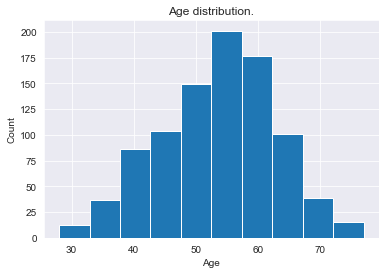

In [ ]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution.')

> Age distribution by sex (0 = female, 1 = male)

<AxesSubplot:xlabel='age', ylabel='Count'>

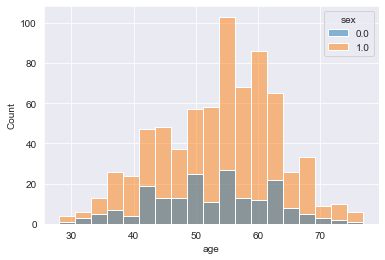

In [ ]:
sns.histplot(data=df, x="age", hue="sex")

In [ ]:
#Lets investigate age values
minAge=min(df.age)
maxAge=max(df.age)
meanAge=df.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 28.0
Max Age : 77.0
Mean Age : 53.510868


# Seaborn CountPlots

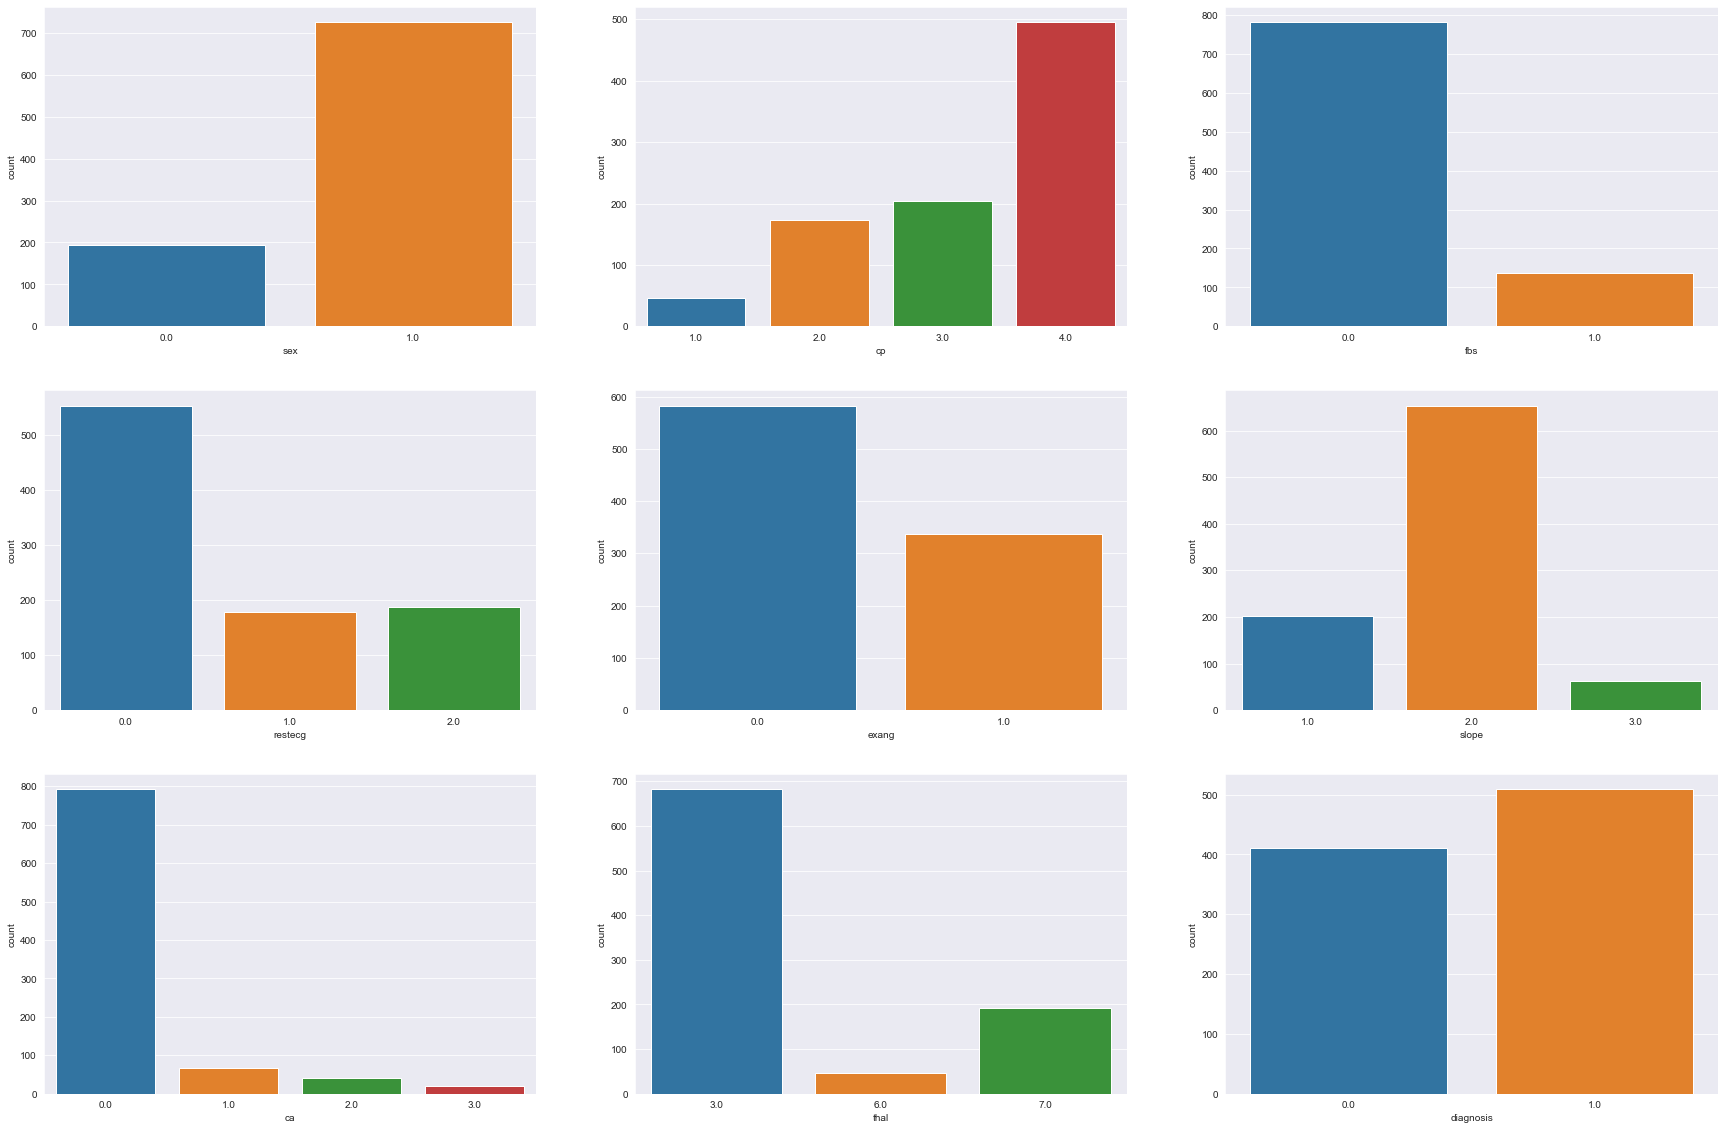

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.countplot(df['sex'])

plt.subplot(3,3,2)
sns.countplot(df['cp'])

plt.subplot(3,3,3)
sns.countplot(df['fbs'])

plt.subplot(3,3,4)
sns.countplot(df['restecg'])

plt.subplot(3,3,5)
sns.countplot(df['exang'])

plt.subplot(3,3,6)
sns.countplot(df['slope'])

plt.subplot(3,3,7)
sns.countplot(df['ca'])

plt.subplot(3,3,8)
sns.countplot(df['thal'])

plt.subplot(3,3,9)
sns.countplot(df['diagnosis'])

plt.show()


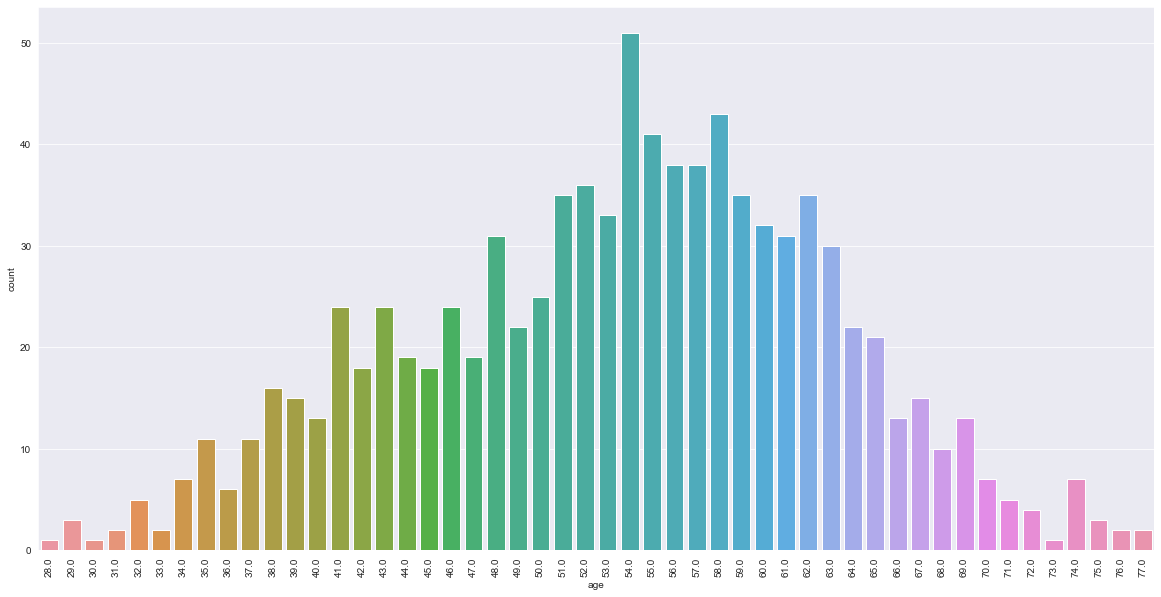

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(df['age'])
plt.xticks(rotation = 90)
plt.show()

# Scatter Plots

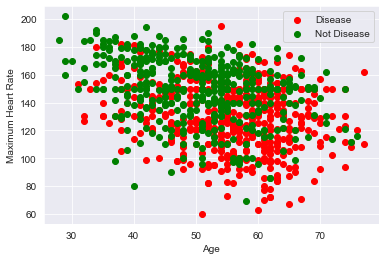

In [ ]:

plt.scatter(x=df.age[df.diagnosis==1], y=df.thalach[(df.diagnosis==1)], c="red")
plt.scatter(x=df.age[df.diagnosis==0], y=df.thalach[(df.diagnosis==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

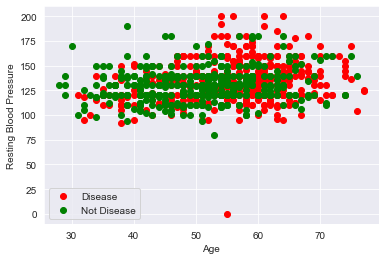

In [ ]:
plt.scatter(x=df.age[df.diagnosis==1], y=df.trestbps[(df.diagnosis==1)], c="red")
plt.scatter(x=df.age[df.diagnosis==0], y=df.trestbps[(df.diagnosis==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.show()

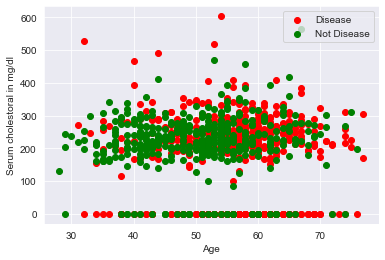

In [ ]:
plt.scatter(x=df.age[df.diagnosis==1], y=df.chol[(df.diagnosis==1)], c="red")
plt.scatter(x=df.age[df.diagnosis==0], y=df.chol[(df.diagnosis==0)], c="green")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum cholestoral in mg/dl")
plt.show()

# DistPlot

Text(0.5, 1.0, 'Resting Blood Pressure Interval')

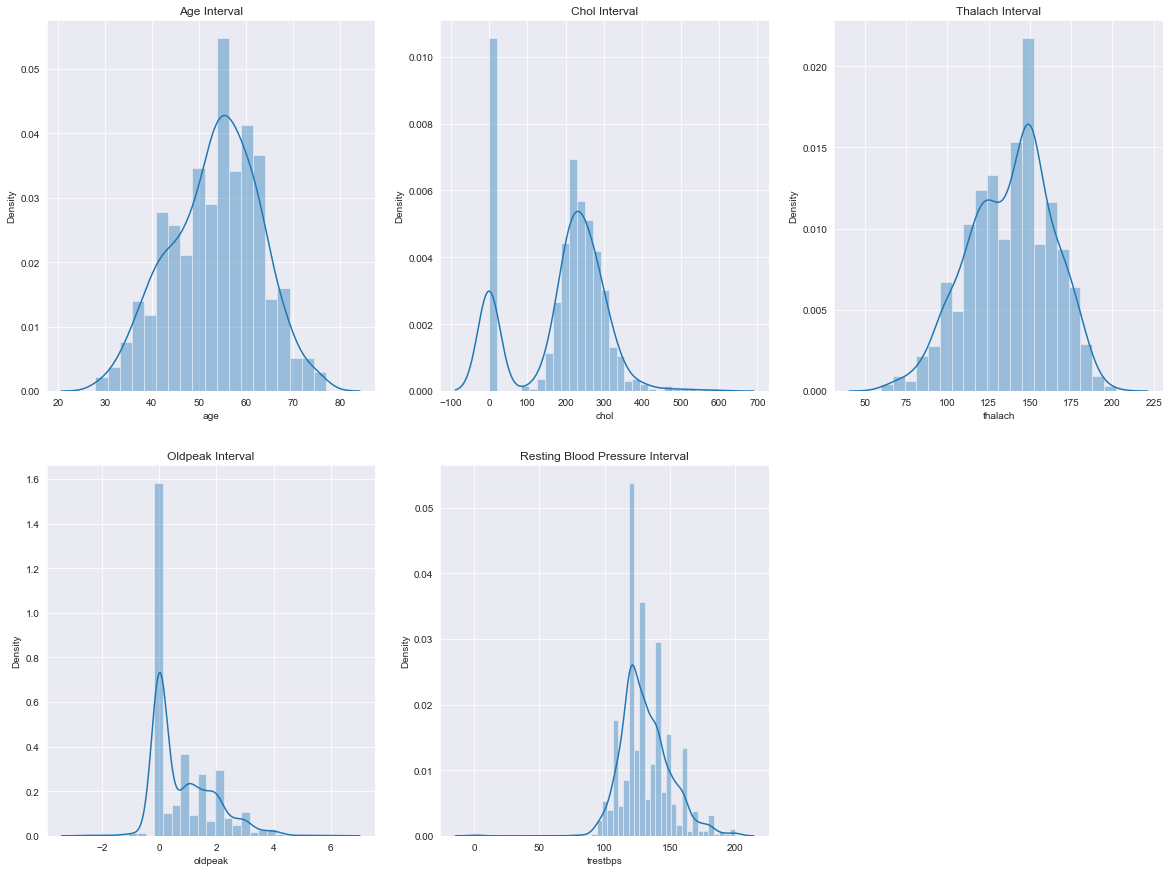

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.distplot(df['age']).set_title('Age Interval')

plt.subplot(2,3,2)
sns.distplot(df['chol']).set_title('Chol Interval')

plt.subplot(2,3,3)
sns.distplot(df['thalach']).set_title('Thalach Interval')

plt.subplot(2,3,4)
sns.distplot(df['oldpeak']).set_title('Oldpeak Interval')

plt.subplot(2,3,5)
sns.distplot(df['trestbps']).set_title('Resting Blood Pressure Interval')


# BarPlots

> Bar plot representation of features about whether they have heart disease or not

<AxesSubplot:xlabel='diagnosis', ylabel='age'>

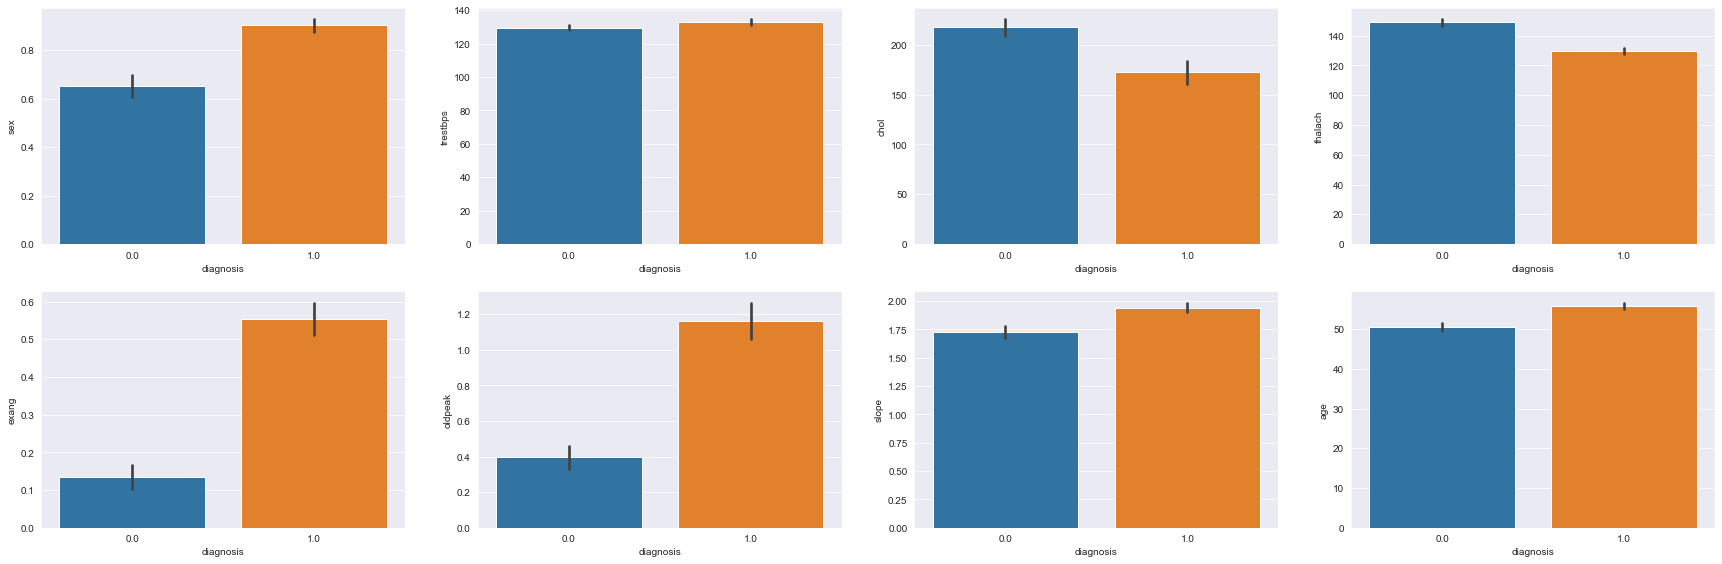

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'diagnosis', y = 'sex', data = df)

plt.subplot(4,4,2)
sns.barplot(x = 'diagnosis', y = 'trestbps', data = df)

plt.subplot(4,4,3)
sns.barplot(x = 'diagnosis', y = 'chol', data = df)

plt.subplot(4,4,4)
sns.barplot(x = 'diagnosis', y = 'thalach', data = df)

plt.subplot(4,4,5)
sns.barplot(x = 'diagnosis', y = 'exang', data = df)

plt.subplot(4,4,6)
sns.barplot(x = 'diagnosis', y = 'oldpeak', data = df)

plt.subplot(4,4,7)
sns.barplot(x = 'diagnosis', y = 'slope', data = df)

plt.subplot(4,4,8)
sns.barplot(x = 'diagnosis', y = 'age', data = df)

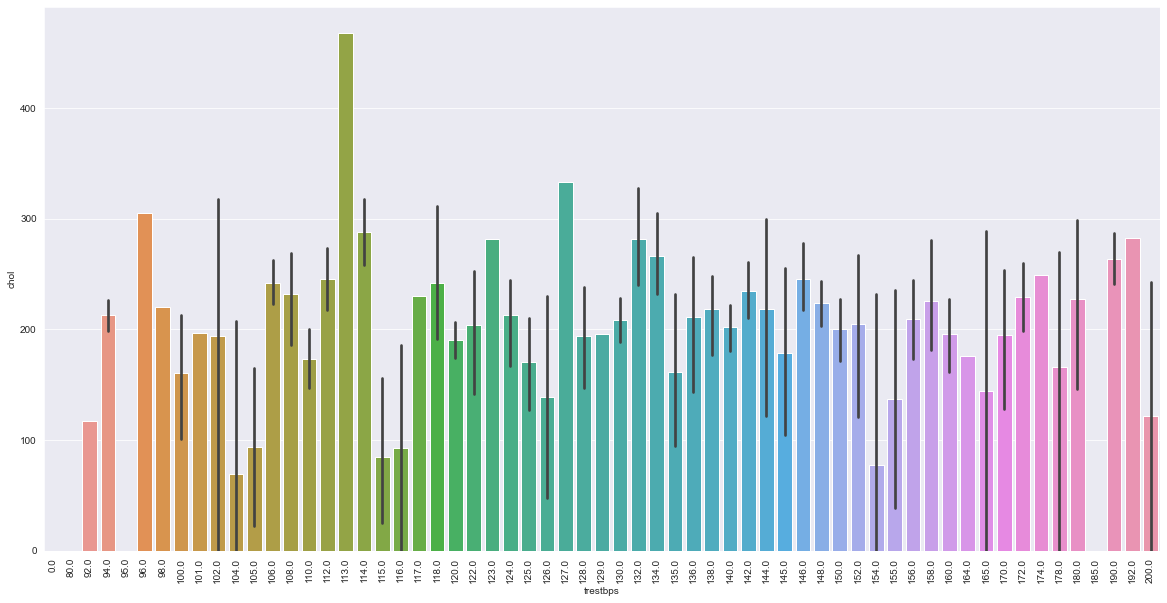

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="trestbps", y="chol", data=df)
plt.xticks(rotation=90)
plt.show()

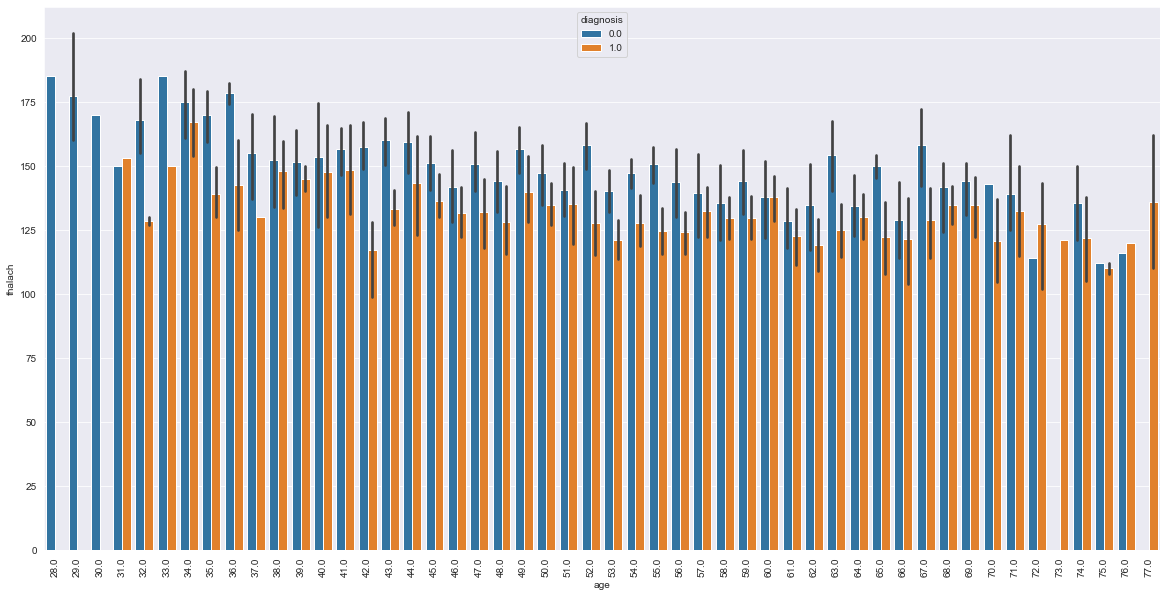

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x="age", y="thalach", data=df, hue="diagnosis")
plt.xticks(rotation=90)
plt.show()

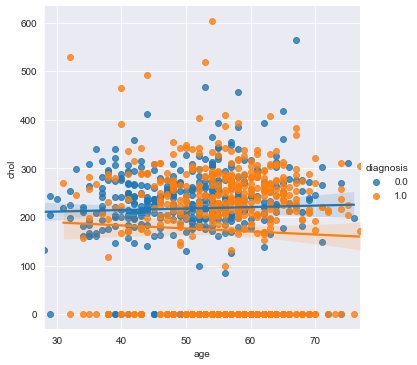

In [ ]:
sns.lmplot(x='age', y='chol', hue='diagnosis', data=df)

# Pairplot

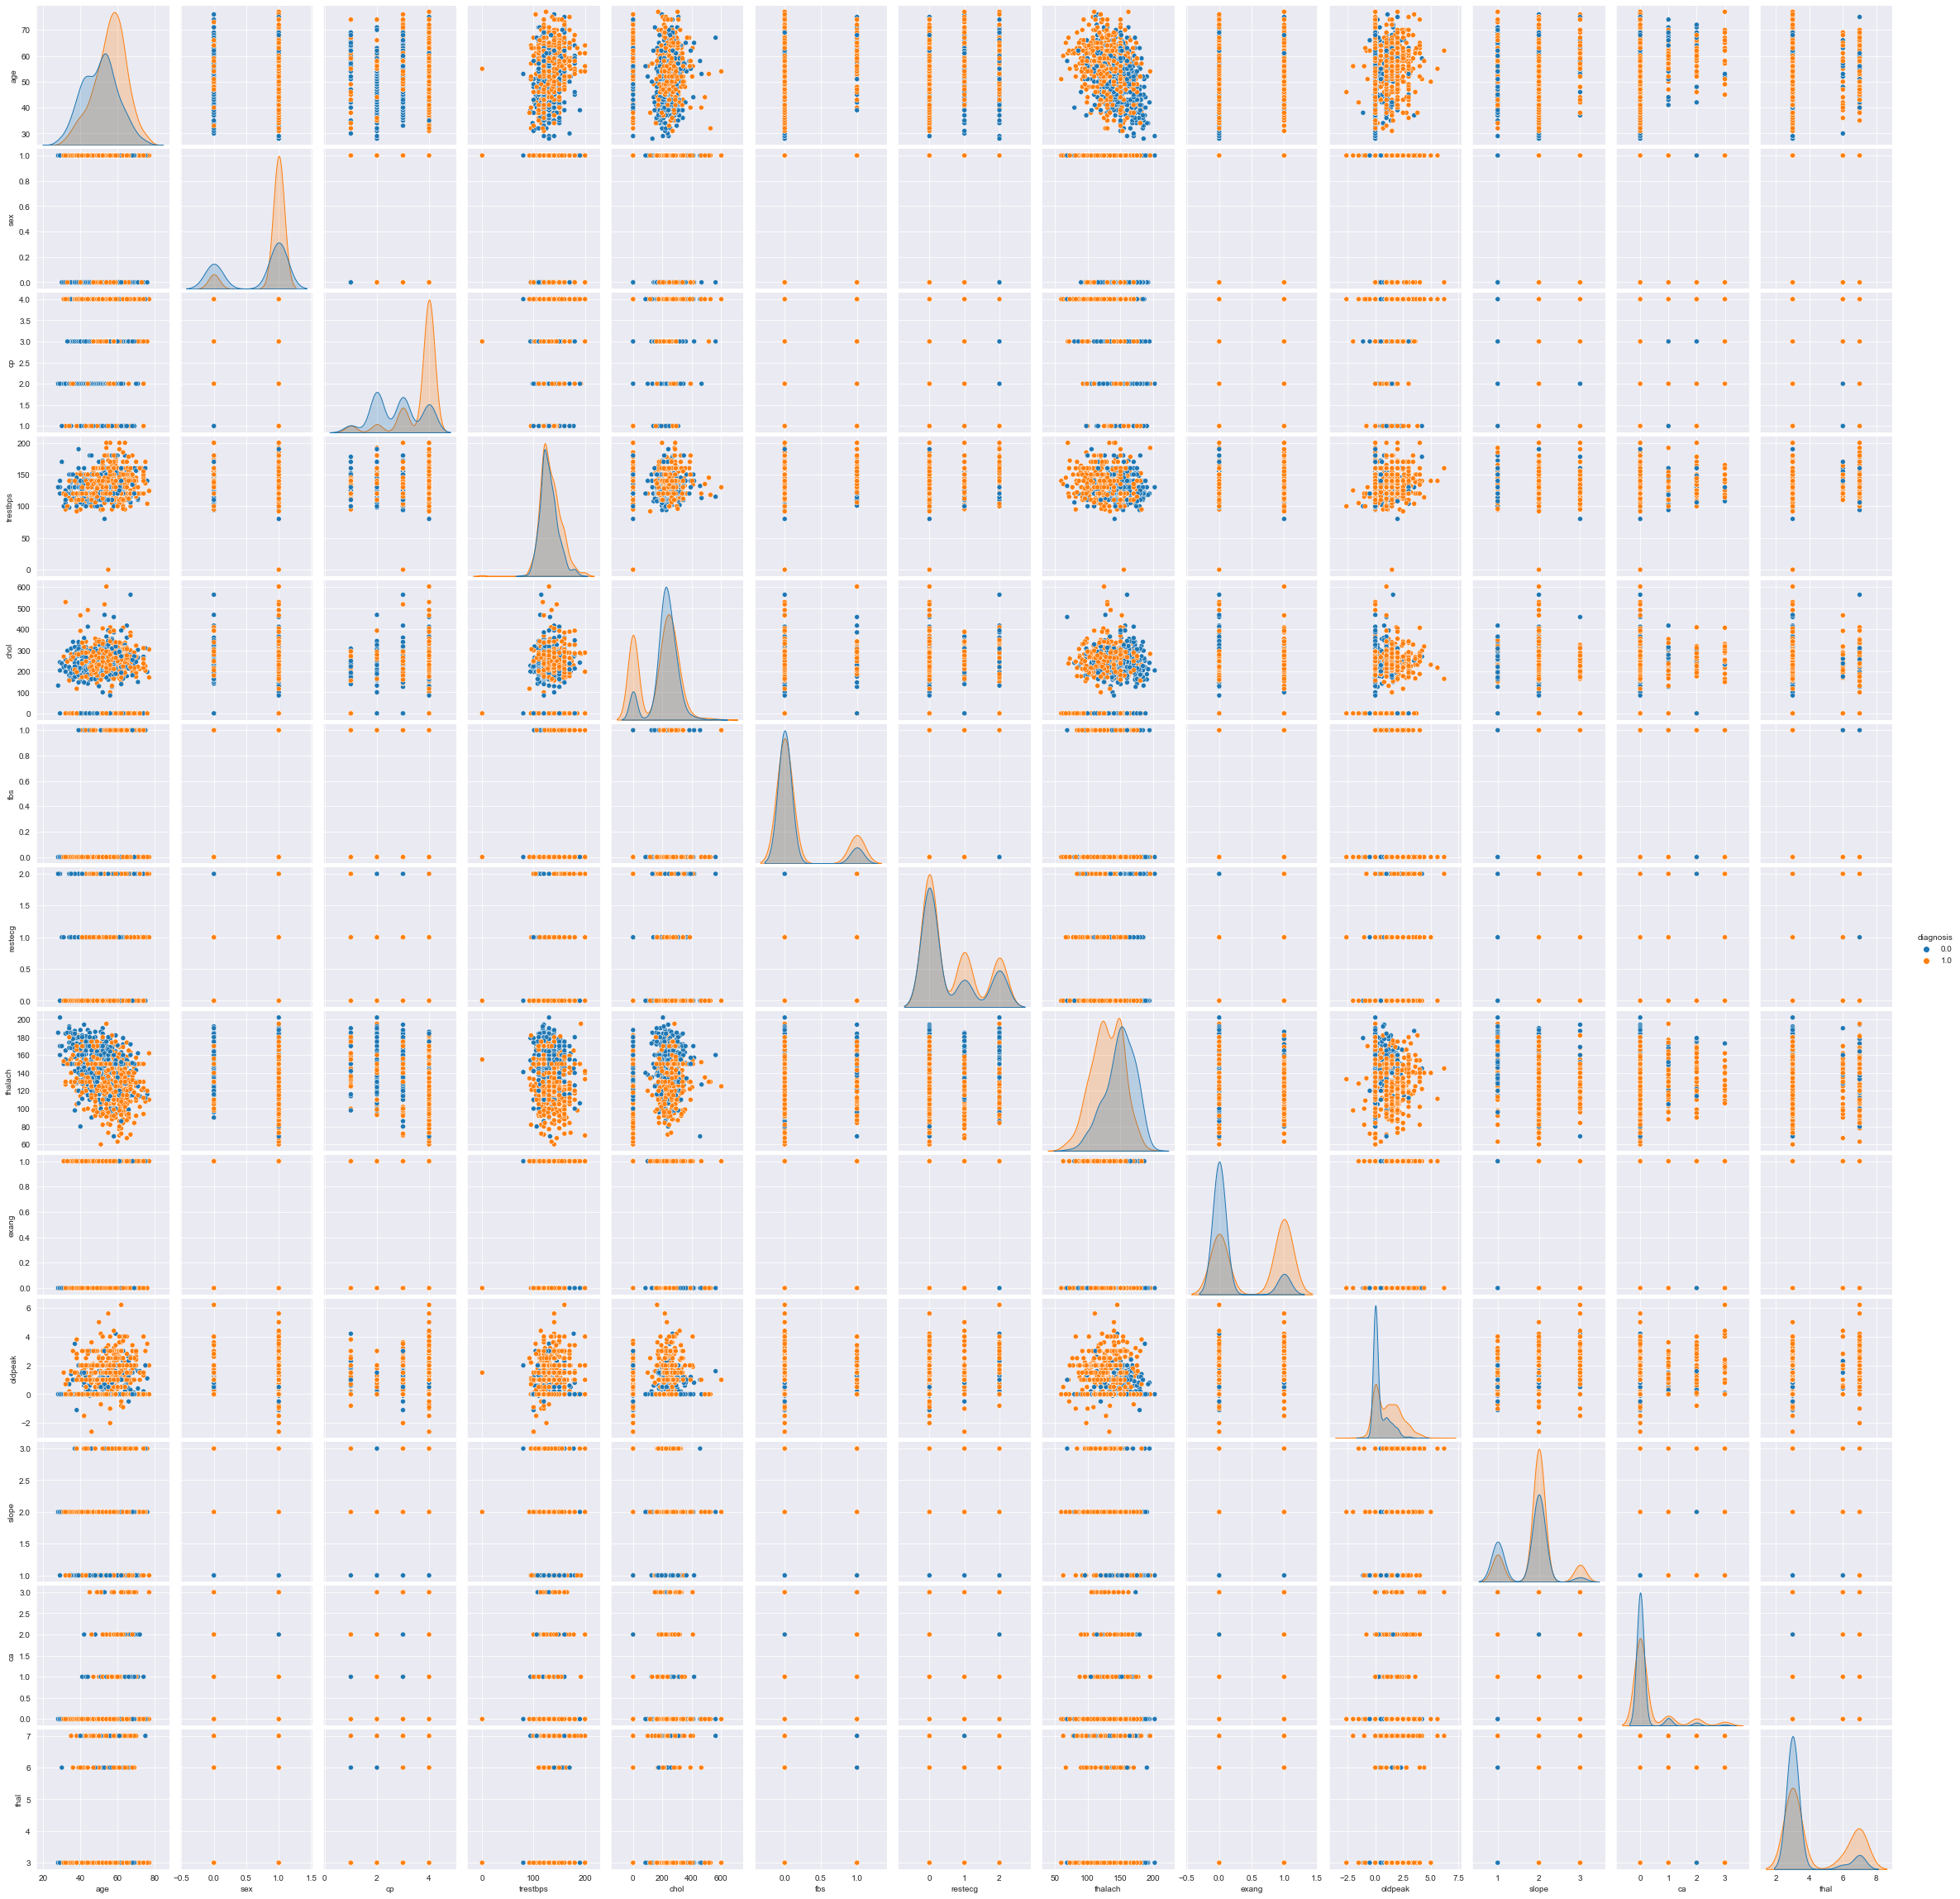

In [ ]:
sns.pairplot(data=df, hue="diagnosis")

# Heatmap

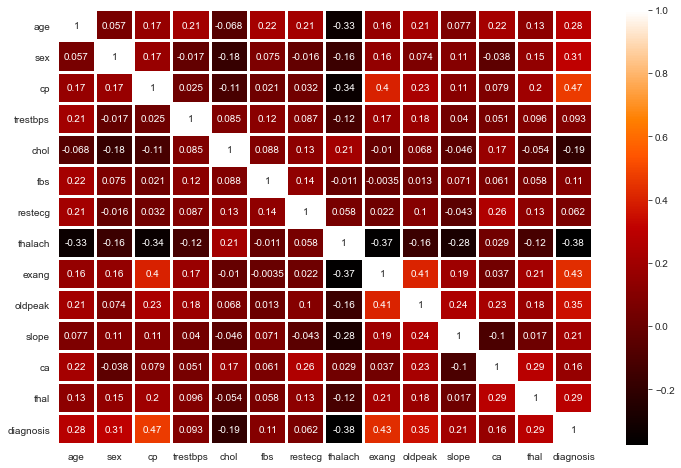

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='gist_heat', linewidths = 2)
plt.show()

# Data Preprocessing

In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 3)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Models

* Logistic Regression
* Naive Bayes
* Random Forest Classifier
* Extreme Gradient Boost
* K-Nearest Neighbour
* Decision Tree
* Support Vector Machine
* Stochastic Gradient Descent
* Neural Nets

In [ ]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[35  9]
 [ 9 39]]
-------------------------------------------
Accuracy of Logistic Regression: 80.43478260869566 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        44
         1.0       0.81      0.81      0.81        48

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.80      0.80      0.80        92



In [ ]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[35  9]
 [12 36]]
-------------------------------------------
Accuracy of Naive Bayes model: 77.17391304347827 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        44
         1.0       0.80      0.75      0.77        48

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



In [ ]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[34 10]
 [10 38]]
-------------------------------------------
Accuracy of Random Forest: 78.26086956521739 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77        44
         1.0       0.79      0.79      0.79        48

    accuracy                           0.78        92
   macro avg       0.78      0.78      0.78        92
weighted avg       0.78      0.78      0.78        92



In [ ]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,xgb_predicted))

[20:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[32 12]
 [ 6 42]]
-------------------------------------------
Accuracy of Extreme Gradient Boost: 80.43478260869566 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78        44
         1.0       0.78      0.88      0.82        48

    accuracy                           0.80        92
   macro avg       0.81      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[35  9]
 [12 36]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 77.17391304347827 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.74      0.80      0.77        44
         1.0       0.80      0.75      0.77        48

    accuracy                           0.77        92
   macro avg       0.77      0.77      0.77        92
weighted avg       0.77      0.77      0.77        92



In [ ]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[30 14]
 [17 31]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 66.30434782608695 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66        44
         1.0       0.69      0.65      0.67        48

    accuracy                           0.66        92
   macro avg       0.66      0.66      0.66        92
weighted avg       0.66      0.66      0.66        92



In [ ]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf',gamma=0.1, C=1.0)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[32 12]
 [13 35]]
-------------------------------------------
Accuracy of Support Vector Classifier: 72.82608695652173 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72        44
         1.0       0.74      0.73      0.74        48

    accuracy                           0.73        92
   macro avg       0.73      0.73      0.73        92
weighted avg       0.73      0.73      0.73        92



In [ ]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("confussion matrix")
print(sgdc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

confussion matrix
[[31 13]
 [15 33]]
-------------------------------------------
Accuracy of : Stochastic Gradient Descent 69.56521739130434 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69        44
         1.0       0.72      0.69      0.70        48

    accuracy                           0.70        92
   macro avg       0.70      0.70      0.70        92
weighted avg       0.70      0.70      0.70        92



In [ ]:
model_nn = 'Neural Nets'
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
mlpc.fit(X_train, y_train)
mlpc_predicted = mlpc.predict(X_test)
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predicted)
mlpc_acc_score = accuracy_score(y_test, mlpc_predicted)
print("confussion matrix")
print(mlpc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : MLP Classifier",mlpc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,mlpc_predicted))

confussion matrix
[[32 12]
 [15 33]]
-------------------------------------------
Accuracy of : MLP Classifier 70.65217391304348 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.73      0.70        44
         1.0       0.73      0.69      0.71        48

    accuracy                           0.71        92
   macro avg       0.71      0.71      0.71        92
weighted avg       0.71      0.71      0.71        92



# Confusion Matrix

<AxesSubplot:title={'center':'Heart Disease --- Model: Neural Nets --- Accuracy:0.78261'}>

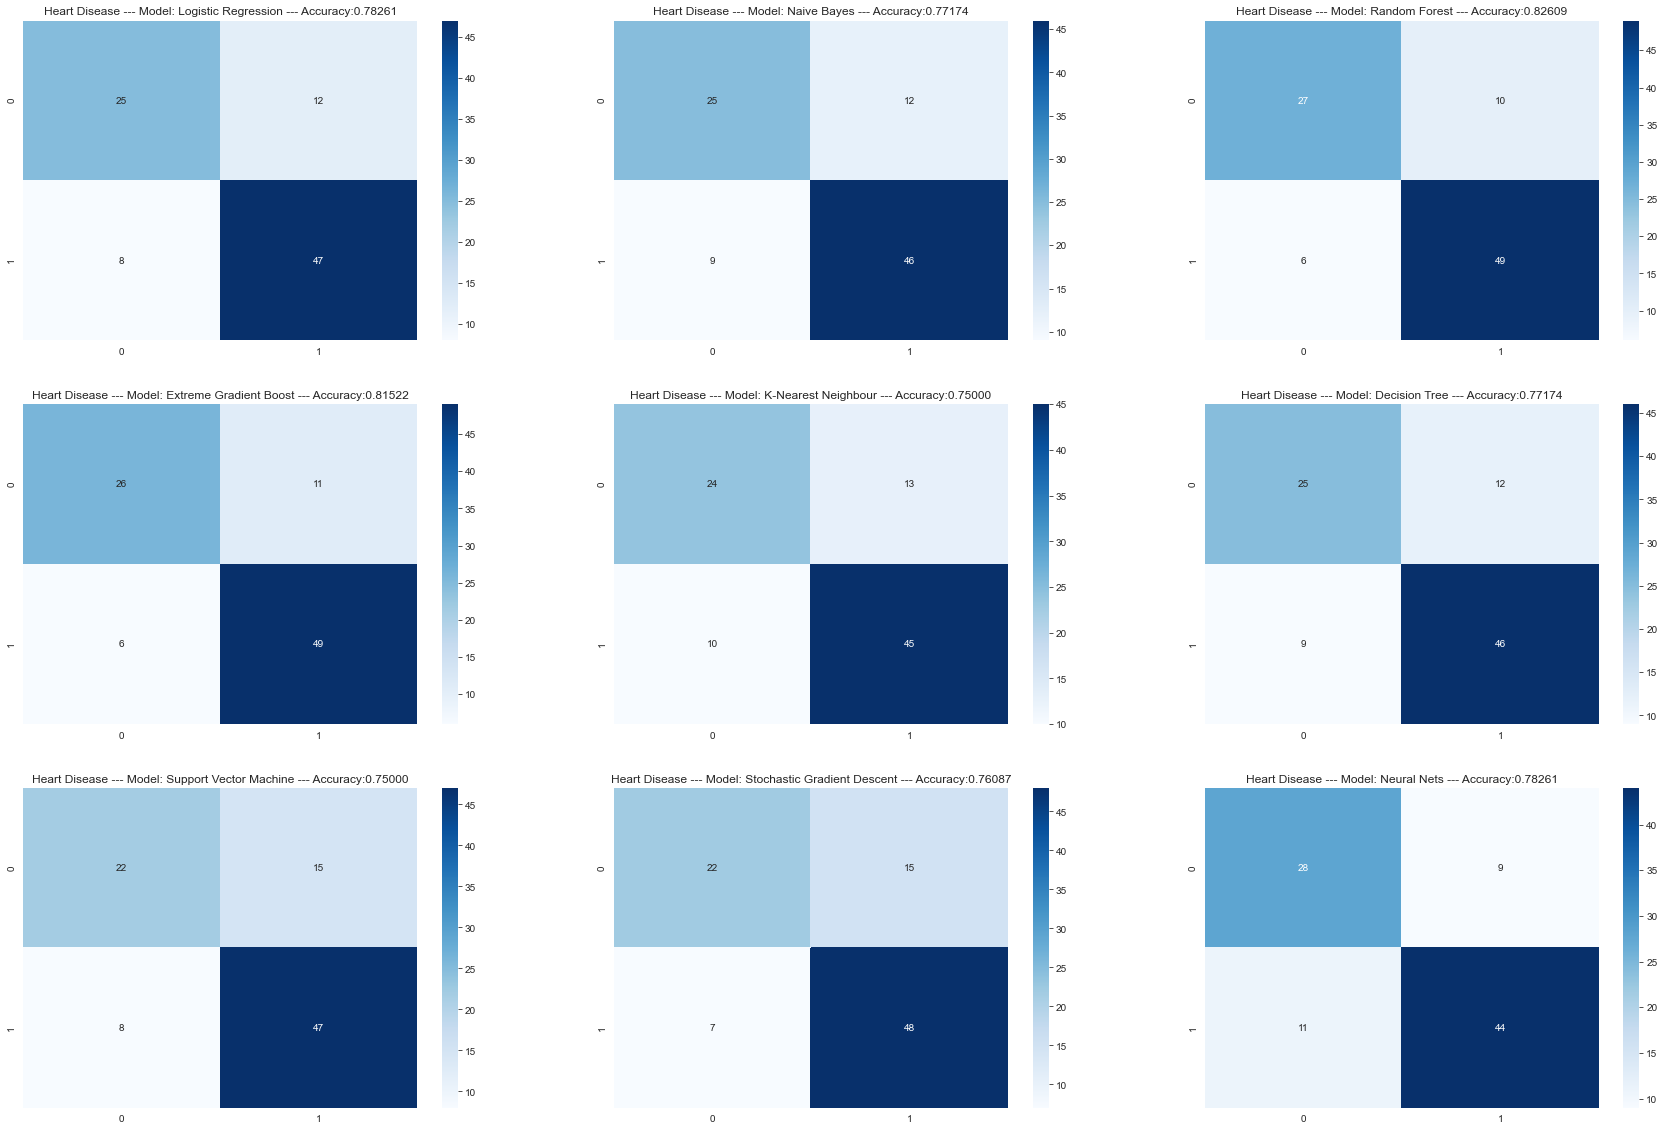

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,2)
plt.title('Heart Disease --- Model: Naive Bayes --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,3)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,4)
plt.title('Heart Disease --- Model: Extreme Gradient Boost --- Accuracy:{x:.5f}'.format(x=xgb_acc_score))
sns.heatmap(xgb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,5)
plt.title('Heart Disease --- Model: K-Nearest Neighbour --- Accuracy:{x:.5f}'.format(x=knn_acc_score))
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,6)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,7)
plt.title('Heart Disease --- Model: Support Vector Machine --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,8)
plt.title('Heart Disease --- Model: Stochastic Gradient Descent --- Accuracy:{x:.5f}'.format(x=sgdc_acc_score))
sns.heatmap(sgdc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,9)
plt.title('Heart Disease --- Model: Neural Nets --- Accuracy:{x:.5f}'.format(x=mlpc_acc_score))
sns.heatmap(mlpc_conf_matrix, annot=True, cmap="Blues")





# Feature Importance

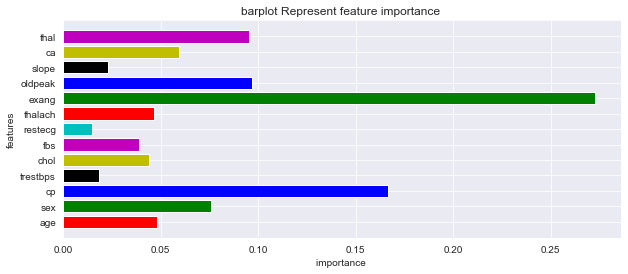

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

# Evaluation of Models

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine', 'Stochastic Gradient Descent', 'Neural Nets'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, sgdc_acc_score*100, mlpc_acc_score*100]})
model_ev

Model   Accuracy
0          Logistic Regression  78.260870
1                  Naive Bayes  77.173913
2                Random Forest  82.608696
3       Extreme Gradient Boost  81.521739
4          K-Nearest Neighbour  75.000000
5                Decision Tree  69.565217
6       Support Vector Machine  75.000000
7  Stochastic Gradient Descent  76.086957
8                  Neural Nets  78.260870

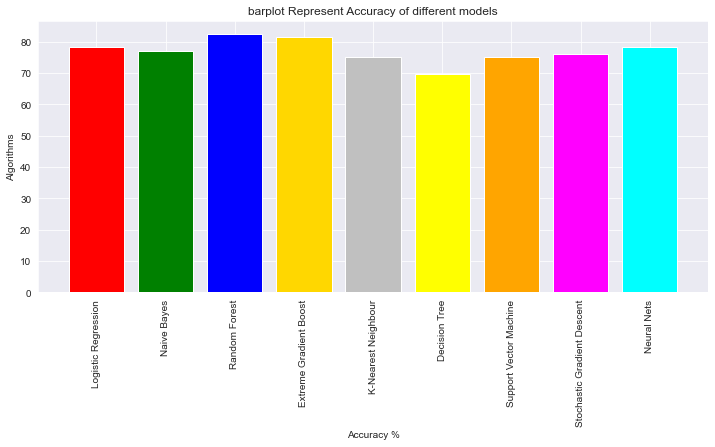

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

**bold text**# Conclusion

> Extreme Gradient Boost gave the best accuracy on test with the :81% 

# After Data Augmentation

In [ ]:
from collections import Counter
print("Before OverSampling, counts of label ': {}".format(Counter(y))) 
  

from imblearn.over_sampling import SVMSMOTE 
sm = SVMSMOTE(random_state = 2,sampling_strategy='auto',) 
X_res, y_res = sm.fit_resample(X, y.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape)) 
  

print("After OverSampling, counts of label ': {}".format(Counter(y_res))) 


Before OverSampling, counts of label ': Counter({1.0: 509, 0.0: 411})
After OverSampling, the shape of train_X: (1018, 13)
After OverSampling, the shape of train_y: (1018,) 

After OverSampling, counts of label ': Counter({0.0: 509, 1.0: 509})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.1, random_state = 3)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[45  8]
 [ 8 41]]
-------------------------------------------
Accuracy of Logistic Regression: 84.31372549019608 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        53
         1.0       0.84      0.84      0.84        49

    accuracy                           0.84       102
   macro avg       0.84      0.84      0.84       102
weighted avg       0.84      0.84      0.84       102



In [ ]:
model_nb = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,nbpred))

confussion matrix
[[46  7]
 [11 38]]
-------------------------------------------
Accuracy of Naive Bayes model: 82.35294117647058 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        53
         1.0       0.84      0.78      0.81        49

    accuracy                           0.82       102
   macro avg       0.83      0.82      0.82       102
weighted avg       0.82      0.82      0.82       102



In [ ]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[47  6]
 [ 9 40]]
-------------------------------------------
Accuracy of Random Forest: 85.29411764705883 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86        53
         1.0       0.87      0.82      0.84        49

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102



In [ ]:
model_egb = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,xgb_predicted))

[20:53:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[45  8]
 [ 7 42]]
-------------------------------------------
Accuracy of Extreme Gradient Boost: 85.29411764705883 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86        53
         1.0       0.84      0.86      0.85        49

    accuracy                           0.85       102
   macro avg       0.85      0.85      0.85       102
weighted avg       0.85      0.85      0.85       102



In [ ]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[45  8]
 [13 36]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 79.41176470588235 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.78      0.85      0.81        53
         1.0       0.82      0.73      0.77        49

    accuracy                           0.79       102
   macro avg       0.80      0.79      0.79       102
weighted avg       0.80      0.79      0.79       102



In [ ]:
model_dtc = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("-------------------------------------------")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,dt_predicted))

confussion matrix
[[49  4]
 [23 26]]
-------------------------------------------
Accuracy of DecisionTreeClassifier: 73.52941176470588 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78        53
         1.0       0.87      0.53      0.66        49

    accuracy                           0.74       102
   macro avg       0.77      0.73      0.72       102
weighted avg       0.77      0.74      0.72       102



In [ ]:
model_svc = 'Support Vector Classifier'
svc =  SVC(kernel='rbf',gamma=0.1, C=1.0)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,svc_predicted))

confussion matrix
[[45  8]
 [11 38]]
-------------------------------------------
Accuracy of Support Vector Classifier: 81.37254901960785 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        53
         1.0       0.83      0.78      0.80        49

    accuracy                           0.81       102
   macro avg       0.81      0.81      0.81       102
weighted avg       0.81      0.81      0.81       102



In [ ]:
model_sgd = 'Stochastic Gradient Descent'
sgdc = SGDClassifier(max_iter=5000, random_state=0)
sgdc.fit(X_train, y_train)
sgdc_predicted = sgdc.predict(X_test)
sgdc_conf_matrix = confusion_matrix(y_test, sgdc_predicted)
sgdc_acc_score = accuracy_score(y_test, sgdc_predicted)
print("confussion matrix")
print(sgdc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : Stochastic Gradient Descent",sgdc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,sgdc_predicted))

confussion matrix
[[36 17]
 [ 7 42]]
-------------------------------------------
Accuracy of : Stochastic Gradient Descent 76.47058823529412 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.84      0.68      0.75        53
         1.0       0.71      0.86      0.78        49

    accuracy                           0.76       102
   macro avg       0.77      0.77      0.76       102
weighted avg       0.78      0.76      0.76       102



In [ ]:
model_nn = 'Neural Nets'
mlpc = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
mlpc.fit(X_train, y_train)
mlpc_predicted = mlpc.predict(X_test)
mlpc_conf_matrix = confusion_matrix(y_test, mlpc_predicted)
mlpc_acc_score = accuracy_score(y_test, mlpc_predicted)
print("confussion matrix")
print(mlpc_conf_matrix)
print("-------------------------------------------")
print("Accuracy of : MLP Classifier",mlpc_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,mlpc_predicted))

confussion matrix
[[43 10]
 [17 32]]
-------------------------------------------
Accuracy of : MLP Classifier 73.52941176470588 

-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        53
         1.0       0.76      0.65      0.70        49

    accuracy                           0.74       102
   macro avg       0.74      0.73      0.73       102
weighted avg       0.74      0.74      0.73       102



<AxesSubplot:title={'center':'Heart Disease --- Model: Neural Nets --- Accuracy:0.73529'}>

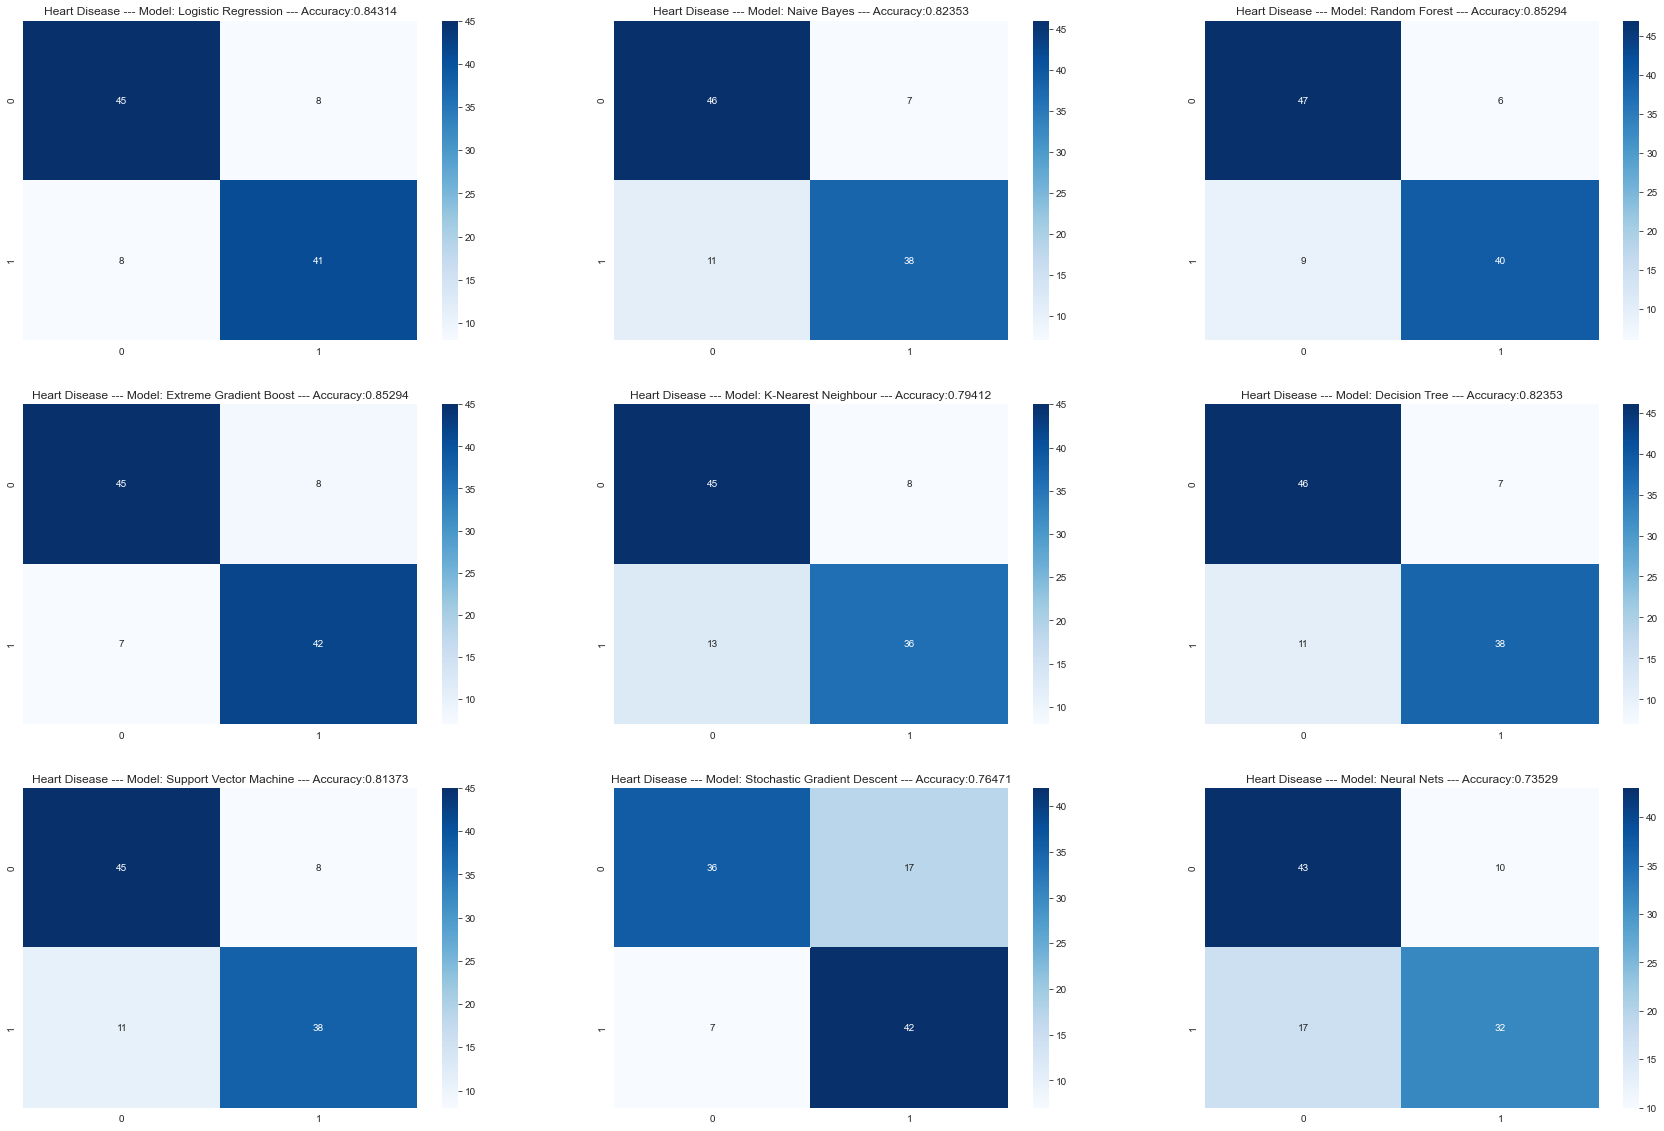

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
plt.title('Heart Disease --- Model: Logistic Regression --- Accuracy:{x:.5f}'.format(x=lr_acc_score))
sns.heatmap(lr_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,2)
plt.title('Heart Disease --- Model: Naive Bayes --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,3)
plt.title('Heart Disease --- Model: Random Forest --- Accuracy:{x:.5f}'.format(x=rf_acc_score) )
sns.heatmap(rf_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,4)
plt.title('Heart Disease --- Model: Extreme Gradient Boost --- Accuracy:{x:.5f}'.format(x=xgb_acc_score))
sns.heatmap(xgb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,5)
plt.title('Heart Disease --- Model: K-Nearest Neighbour --- Accuracy:{x:.5f}'.format(x=knn_acc_score))
sns.heatmap(knn_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,6)
plt.title('Heart Disease --- Model: Decision Tree --- Accuracy:{x:.5f}'.format(x=nb_acc_score))
sns.heatmap(nb_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,7)
plt.title('Heart Disease --- Model: Support Vector Machine --- Accuracy:{x:.5f}'.format(x=svc_acc_score))
sns.heatmap(svc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,8)
plt.title('Heart Disease --- Model: Stochastic Gradient Descent --- Accuracy:{x:.5f}'.format(x=sgdc_acc_score))
sns.heatmap(sgdc_conf_matrix, annot=True, cmap="Blues")

plt.subplot(3,3,9)
plt.title('Heart Disease --- Model: Neural Nets --- Accuracy:{x:.5f}'.format(x=mlpc_acc_score))
sns.heatmap(mlpc_conf_matrix, annot=True, cmap="Blues")


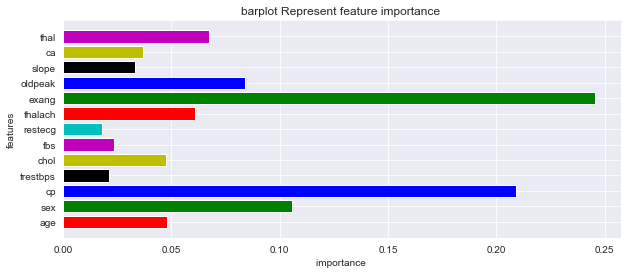

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine', 'Stochastic Gradient Descent', 'Neural Nets'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100, sgdc_acc_score*100, mlpc_acc_score*100]})
model_ev

Model   Accuracy
0          Logistic Regression  84.313725
1                  Naive Bayes  82.352941
2                Random Forest  85.294118
3       Extreme Gradient Boost  85.294118
4          K-Nearest Neighbour  79.411765
5                Decision Tree  73.529412
6       Support Vector Machine  81.372549
7  Stochastic Gradient Descent  76.470588
8                  Neural Nets  73.529412

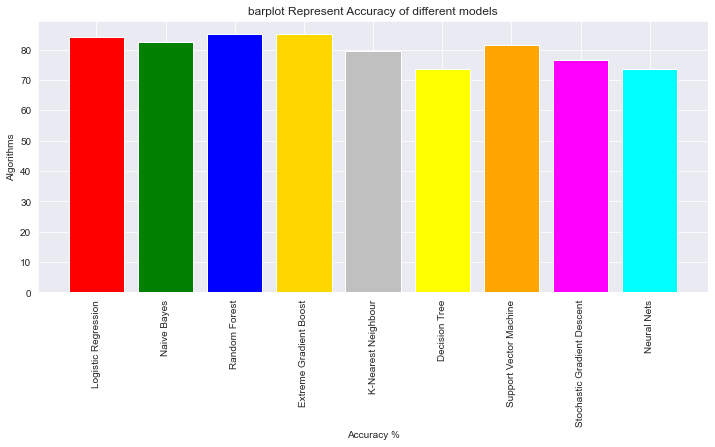

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','magenta', 'cyan']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.xticks(rotation=90)
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

*italicized text*# Conclusion


Extreme Gradient Boost and random forest gave the best accuracy on test with the :85% 